In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [4]:
df1=pd.read_csv(r'C:\Users\Aviral\Desktop\archive\Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df2=df1.drop(['availability','society','area_type','balcony'],axis='columns')

In [7]:
df2.head()


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df3=df2.dropna()
df3.isnull()

,location,size,total_sqft,bath,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
13315,False,False,False,False,False
13316,False,False,False,False,False
13317,False,False,False,False,False
13318,False,False,False,False,False


In [13]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

C:\Users\Aviral\AppData\Local\Temp\ipykernel_10692\2831196071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def is_float(x):
    try:
       float(x)
    except:
       return False
    return True   
df3[df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [21]:
df3['price']=df3['price']*100000
df3.head()

C:\Users\Aviral\AppData\Local\Temp\ipykernel_10692\3525038096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['price']=df3['price']*100000


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,3907000.0,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,12000000.0,4
2,Uttarahalli,3 BHK,1440,2.0,6200000.0,3
3,Lingadheeranahalli,3 BHK,1521,3.0,9500000.0,3
4,Kothanur,2 BHK,1200,2.0,5100000.0,2


In [23]:
df4=df3.copy()
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,3907000.0,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,12000000.0,4
2,Uttarahalli,3 BHK,1440,2.0,6200000.0,3
3,Lingadheeranahalli,3 BHK,1521,3.0,9500000.0,3
4,Kothanur,2 BHK,1200,2.0,5100000.0,2


In [25]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

df4['total_sqft'].apply(convert_sqft_num).head(10)

NameError: name 'convert_sqft_num' is not defined

In [27]:
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,3907000.0,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,12000000.0,4


In [29]:
df4.loc[30]

location       Yelahanka
size               4 BHK
total_sqft        2475.0
bath                 4.0
price         18600000.0
bhk                    4
Name: 30, dtype: object

In [31]:
df5=df4.copy()
df5['price_per_sqft'] = df5['price']/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,3907000.0,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,12000000.0,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,6200000.0,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,9500000.0,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,5100000.0,2,4250.000000


In [33]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats


location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [35]:
len(location_stats[location_stats<=10])

1047

In [37]:
len(df5.location.unique())

1287

In [59]:
location_stats_less_than_ten=location_stats[location_stats<=10]

In [61]:
df5.location=df5.location.apply(lambda x:'other' if x in location_stats_less_than_ten else x)
len(location_stats[location_stats<=10])

1047

In [63]:
len(df5.location.unique())

241

In [65]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]

In [67]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,3907000.0,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,12000000.0,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,6200000.0,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,9500000.0,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,5100000.0,2,4250.000000


In [69]:
df6=df6.drop('location_stats_less_than_ten',axis='columns')

KeyError: "['location_stats_less_than_ten'] not found in axis"

In [71]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,3907000.0,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,12000000.0,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,6200000.0,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,9500000.0,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,5100000.0,2,4250.000000


In [73]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [75]:
df7=remove_pps_outliers(df6)
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,42800000.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,19400000.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,23500000.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,13000000.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,14800000.0,2,11983.805668


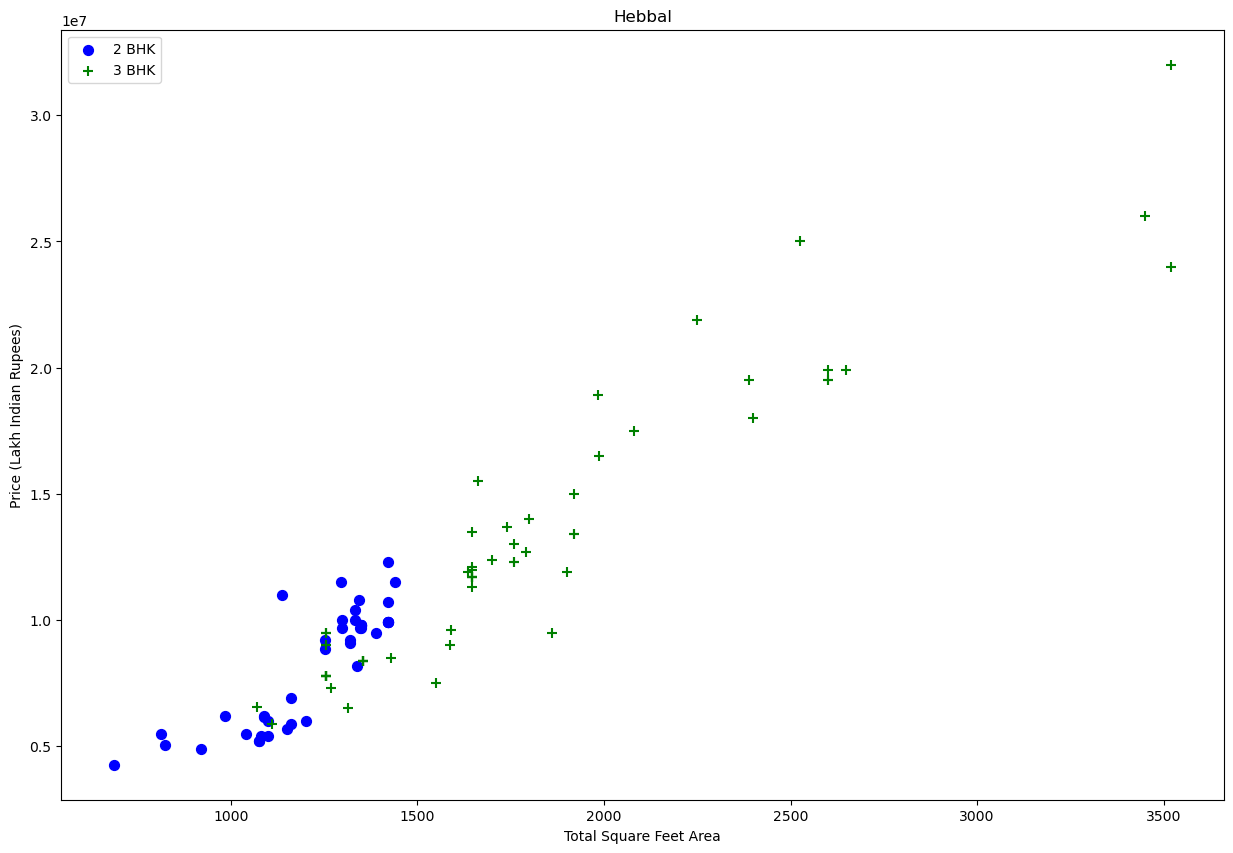

In [81]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Hebbal")

In [83]:
'''We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment'''

"We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.\n\n{\n    '1' : {\n        'mean': 4000,\n        'std: 2000,\n        'count': 34\n    },\n    '2' : {\n        'mean': 4300,\n        'std: 2300,\n        'count': 22\n    },    \n}\nNow we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment"

In [105]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
                                                 
                                           
                                            
                                        
                                        

In [109]:
df8=remove_bhk_outliers(df7)
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,42800000.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,19400000.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,23500000.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,13000000.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,14800000.0,2,11983.805668


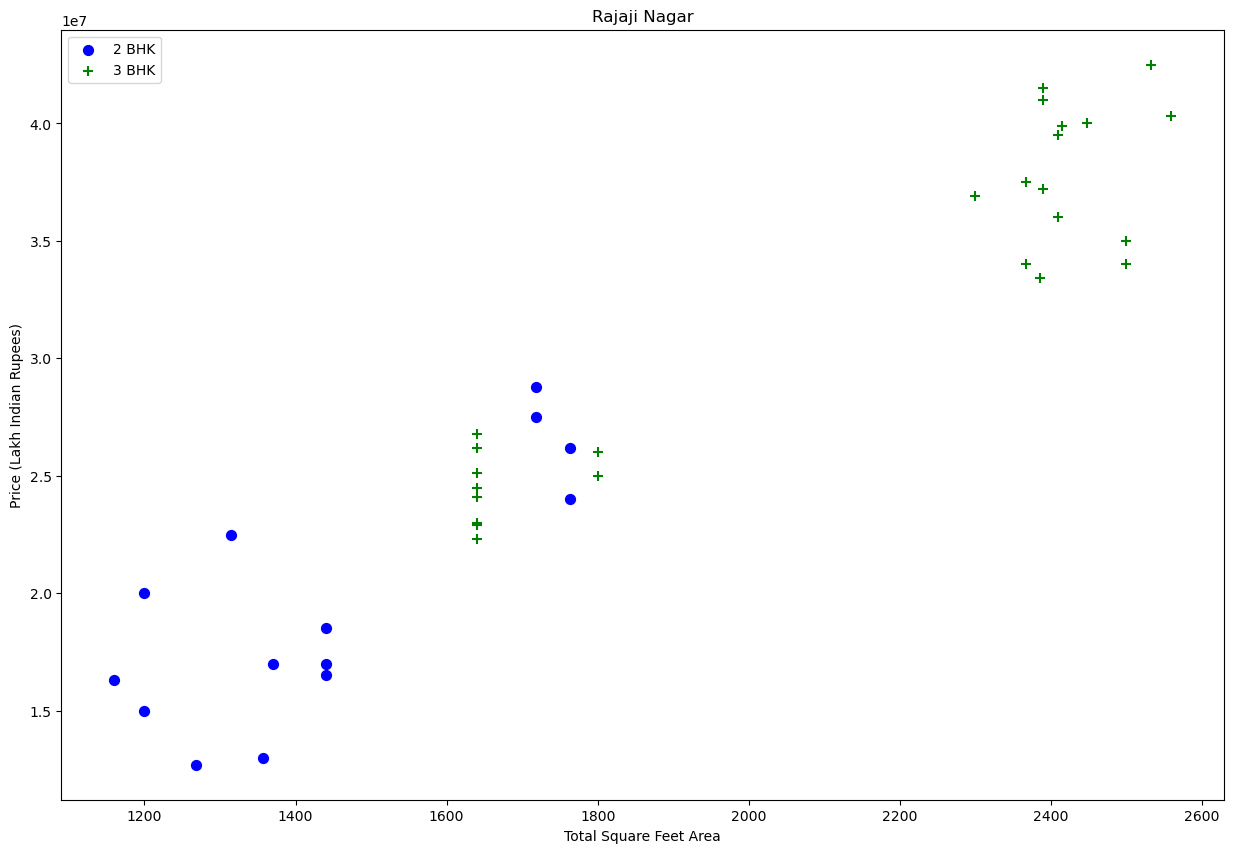

In [111]:
plot_scatter_chart(df8,"Rajaji Nagar")

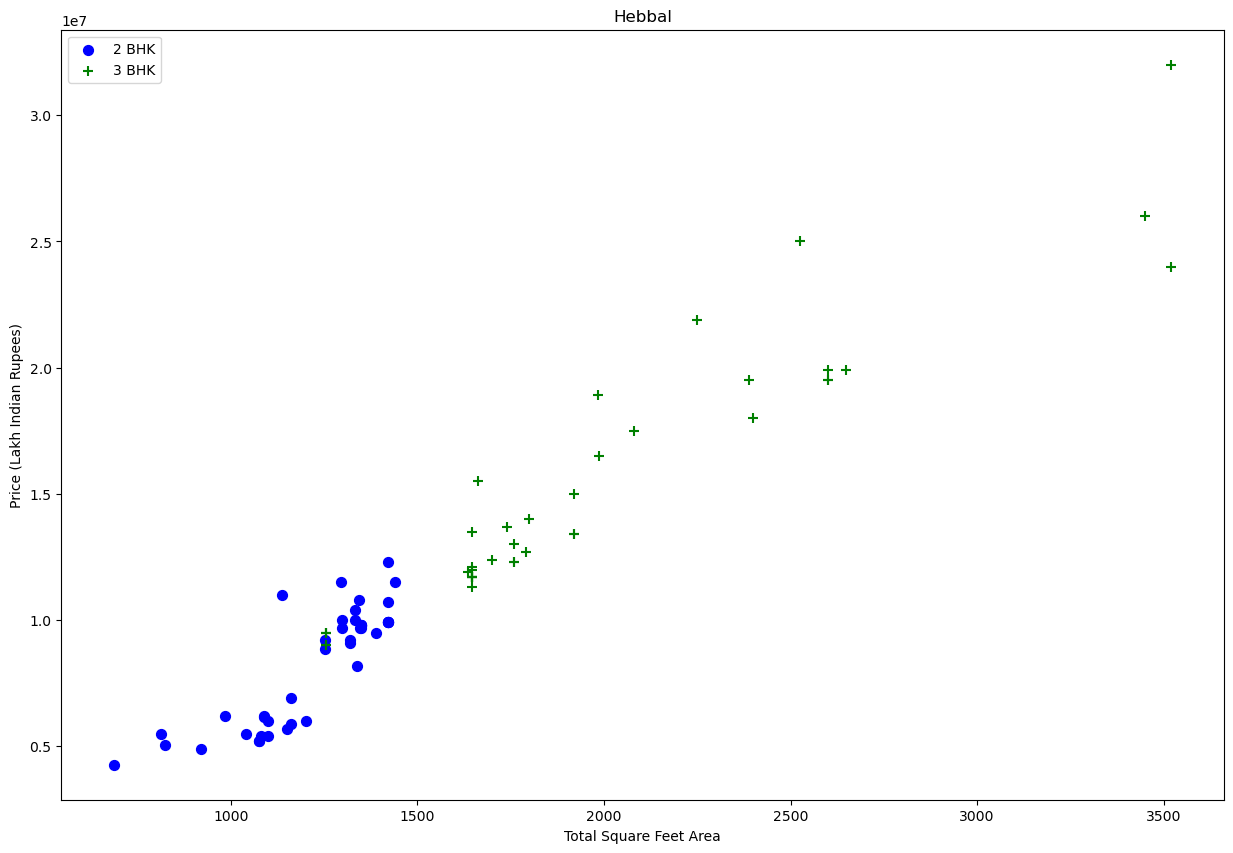

In [113]:
plot_scatter_chart(df8,"Hebbal")

In [115]:
df9=df8[df8.bath<df8.bhk+2]

In [121]:
df9[df9.bath>4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,8500000.0,5,5666.666667
45,5th Block Hbr Layout,5 Bedroom,3600.0,5.0,13000000.0,5,3611.111111
46,5th Block Hbr Layout,6 BHK,5100.0,5.0,30000000.0,6,5882.352941
55,5th Phase JP Nagar,5 BHK,2500.0,5.0,11000000.0,5,4400.000000
69,5th Phase JP Nagar,5 BHK,4000.0,5.0,17000000.0,5,4250.000000
...,...,...,...,...,...,...,...
10067,other,5 Bedroom,1600.0,5.0,14000000.0,5,8750.000000
10083,other,5 Bedroom,1650.0,6.0,20000000.0,5,12121.212121
10146,other,4 Bedroom,3100.0,5.0,42500000.0,4,13709.677419
10222,other,6 Bedroom,1800.0,5.0,14000000.0,6,7777.777778


In [125]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')

In [127]:
df10

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,42800000.0,4
1,1st Block Jayanagar,1630.0,3.0,19400000.0,3
2,1st Block Jayanagar,1875.0,2.0,23500000.0,3
3,1st Block Jayanagar,1200.0,2.0,13000000.0,3
4,1st Block Jayanagar,1235.0,2.0,14800000.0,2
...,...,...,...,...,...
10233,other,1200.0,2.0,7000000.0,2
10234,other,1800.0,1.0,20000000.0,1
10237,other,1353.0,2.0,11000000.0,2
10238,other,812.0,1.0,2600000.0,1


In [135]:
dummies=pd.get_dummies(df10.location)

In [137]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')

In [139]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,42800000.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,19400000.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,23500000.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,13000000.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,14800000.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [141]:
df12=df11.drop('location',axis='columns')

In [143]:
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,42800000.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,19400000.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,23500000.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,13000000.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,14800000.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [157]:
X=df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [159]:
'''
separating dependant variable from independent variable
'''

'\nseparating dependant variable from independent variable\n'

In [161]:
y=df12.price

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8629132245229463

In [165]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [169]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [171]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [173]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [175]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))